<a href="https://colab.research.google.com/github/nikbott/Student-Alcohol-Consumption-EDA/blob/main/student_alcohol_consumption_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Consumo de Álcool entre Estudantes

Melissa Shimada - 821620

Vinícius Reyes Kury - 819730

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr, skew, ttest_ind
import seaborn as sns
import statsmodels.api as sm

# Determinação do Conjunto de Dados


O conjunto de dados escolhido diz respeito ao consumo de álcool por estudantes de duas escolas secundárias em Portugal. Contém dados socioecnonômicos. de gênero e acadêmicos de alunos das trilhas de português e matemática das escolas "Gabriel Pereira" e "Mousinho da Silveira". Dados extraídos do [Kaggle](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
math = "/content/drive/MyDrive/student_alcohol_consumption/student-mat.csv"
port = "/content/drive/MyDrive/student_alcohol_consumption/student-por.csv"
df_math, df_port = pd.read_csv(math), pd.read_csv(port)

In [ ]:
display(df_math.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
display(df_port.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


A seguir encontram-se os atributos e tipos de dados presentes em ambos os datasets:

- **school:** Escola do estudante (binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)
- **sex:** Sexo do estudante (binário: 'F' - feminino ou 'M' - masculino)
- **age:** Idade do estudante (numérico: de 15 a 22 anos)
- **address:** Tipo de endereço da casa do estudante (binário: 'U' - urbano ou 'R' - rural)
- **famsize:** Tamanho da família (binário: 'LE3' - menor ou igual a 3 ou 'GT3' - maior que 3)
- **Pstatus:** Estado de coabitação dos pais (binário: 'T' - morando juntos ou 'A' - separados)
- **Medu:** Educação da mãe (numérico: 0 - nenhum, 1 - ensino primário (4ª série), 2 – 5ª a 9ª série, 3 – ensino médio ou 4 – ensino superior)
- **Fedu:** Educação do pai (numérico: 0 - nenhum, 1 - ensino primário (4ª série), 2 – 5ª a 9ª série, 3 – ensino médio ou 4 – ensino superior)
- **Mjob:** Profissão da mãe (nominal: 'professora', relacionada à 'saúde', 'serviços' civis (por exemplo, administrativos ou policiais), 'em casa' ou 'outro')
- **Fjob:** Profissão do pai (nominal: 'professor', relacionada à 'saúde', 'serviços' civis (por exemplo, administrativos ou policiais), 'em casa' ou 'outro')
- **reason:** Razão para escolher esta escola (nominal: 'perto de casa', 'reputação da escola', 'preferência de curso' ou 'outro')
- **guardian:** Guardião do estudante (nominal: 'mãe', 'pai' ou 'outro')
- **traveltime:** Tempo de viagem de casa para a escola (numérico: 1 - <15 minutos, 2 - 15 a 30 minutos, 3 - 30 minutos a 1 hora, ou 4 - >1 hora)
- **studytime:** Tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas)
- **failures:** Número de reprovações em classes anteriores (numérico: n se 1<=n<3, senão 4)
- **schoolsup:** Apoio educacional extra (binário: sim ou não)
- **famsup:** Apoio educacional familiar (binário: sim ou não)
- **paid:** Aulas extras pagas dentro da disciplina do curso (Matemática ou Português) (binário: sim ou não)
- **activities:** Atividades extracurriculares (binário: sim ou não)
- **nursery:** Frequentou creche (binário: sim ou não)
- **higher:** Deseja cursar ensino superior (binário: sim ou não)
- **internet:** Acesso à Internet em casa (binário: sim ou não)
- **romantic:** Com relacionamento romântico (binário: sim ou não)
- **famrel:** Qualidade dos relacionamentos familiares (numérico: de 1 - muito ruim a 5 - excelente)
- **freetime:** Tempo livre após a escola (numérico: de 1 - muito baixo a 5 - muito alto)
- **goout:** Sair com amigos (numérico: de 1 - muito baixo a 5 - muito alto)
- **Dalc:** Consumo de álcool durante a semana (numérico: de 1 - muito baixo a 5 - muito alto)
- **Walc:** Consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto)
- **health:** Estado de saúde atual (numérico: de 1 - muito ruim a 5 - muito bom)
- **absences:** Número de faltas na escola (numérico: de 0 a 93)
Here is the translation of the provided dataset description into Portuguese:
- **G1:** Nota do primeiro período (numérico: de 0 a 20)
- **G2:** Nota do segundo período (numérico: de 0 a 20)
- **G3:** Nota final (numérico: de 0 a 20, alvo de saída)


In [ ]:
display(df_math.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

None

In [ ]:
display(df_port.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

None

# Preparação dos dados

*Alguns estudantes estão presentes em ambos os data frames. Nesta análise, optou-se por analisar os data frames separadamente, de modo a testar a hipótese que a ênfase escolhida pelo aluno possui correlação com o consumo de álcool.*

Algumas variáveis contém uma quantidade expressiva de outliers, especialmente *absences*, uma vez que a grande maioria dos estudantes possui poucas faltas. Posteriormente, será analisado se o consumo de álcool impacta na quantidade de faltas. *failures* também apresenta destaque, com a maioria nunca tendo repetido.

In [ ]:
def boxplot(df, title_prefix=""):
  numeric_columns = df.select_dtypes(include='int64').columns
  # Setting up subplots
  num_plots = len(numeric_columns)
  num_cols = 3  # Number of columns in each row of subplots
  num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

  # Flatten the axes to handle both 1-row and multi-row subplots
  axes = axes.flatten()

  # Plotting vertical box plots for each numeric column
  for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i], orient='v')
    axes[i].set_title(f'Box Plot para {column}')

  # Hide any excess subplots
  for j in range(num_plots, len(axes)):
    axes[j].axis('off')

  # Set a title for the entire subplot frame
  fig.suptitle(f'{title_prefix} - Box Plots', fontsize=16)

  # Adjust layout to prevent overlapping
  plt.tight_layout(rect=[0, 0, 1, 0.96])

  plt.show()

## Matemática

Não há valores nulos ou ausentes.

In [ ]:
# Check for missing values
display(df_math.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Não há valores incorretos ou discrepantes (ruído).

In [ ]:
# Identifying Uncommon Values
# Display unique values for each categorical column
categorical_columns = df_math.select_dtypes(include='object').columns
for column in categorical_columns:
  unique_values = df_math[column].unique()
  display(f"Unique values for {column}: {unique_values}")

"Unique values for school: ['GP' 'MS']"

"Unique values for sex: ['F' 'M']"

"Unique values for address: ['U' 'R']"

"Unique values for famsize: ['GT3' 'LE3']"

"Unique values for Pstatus: ['A' 'T']"

"Unique values for Mjob: ['at_home' 'health' 'other' 'services' 'teacher']"

"Unique values for Fjob: ['teacher' 'other' 'services' 'health' 'at_home']"

"Unique values for reason: ['course' 'other' 'home' 'reputation']"

"Unique values for guardian: ['mother' 'father' 'other']"

"Unique values for schoolsup: ['yes' 'no']"

"Unique values for famsup: ['no' 'yes']"

"Unique values for paid: ['no' 'yes']"

"Unique values for activities: ['no' 'yes']"

"Unique values for nursery: ['yes' 'no']"

"Unique values for higher: ['yes' 'no']"

"Unique values for internet: ['no' 'yes']"

"Unique values for romantic: ['no' 'yes']"

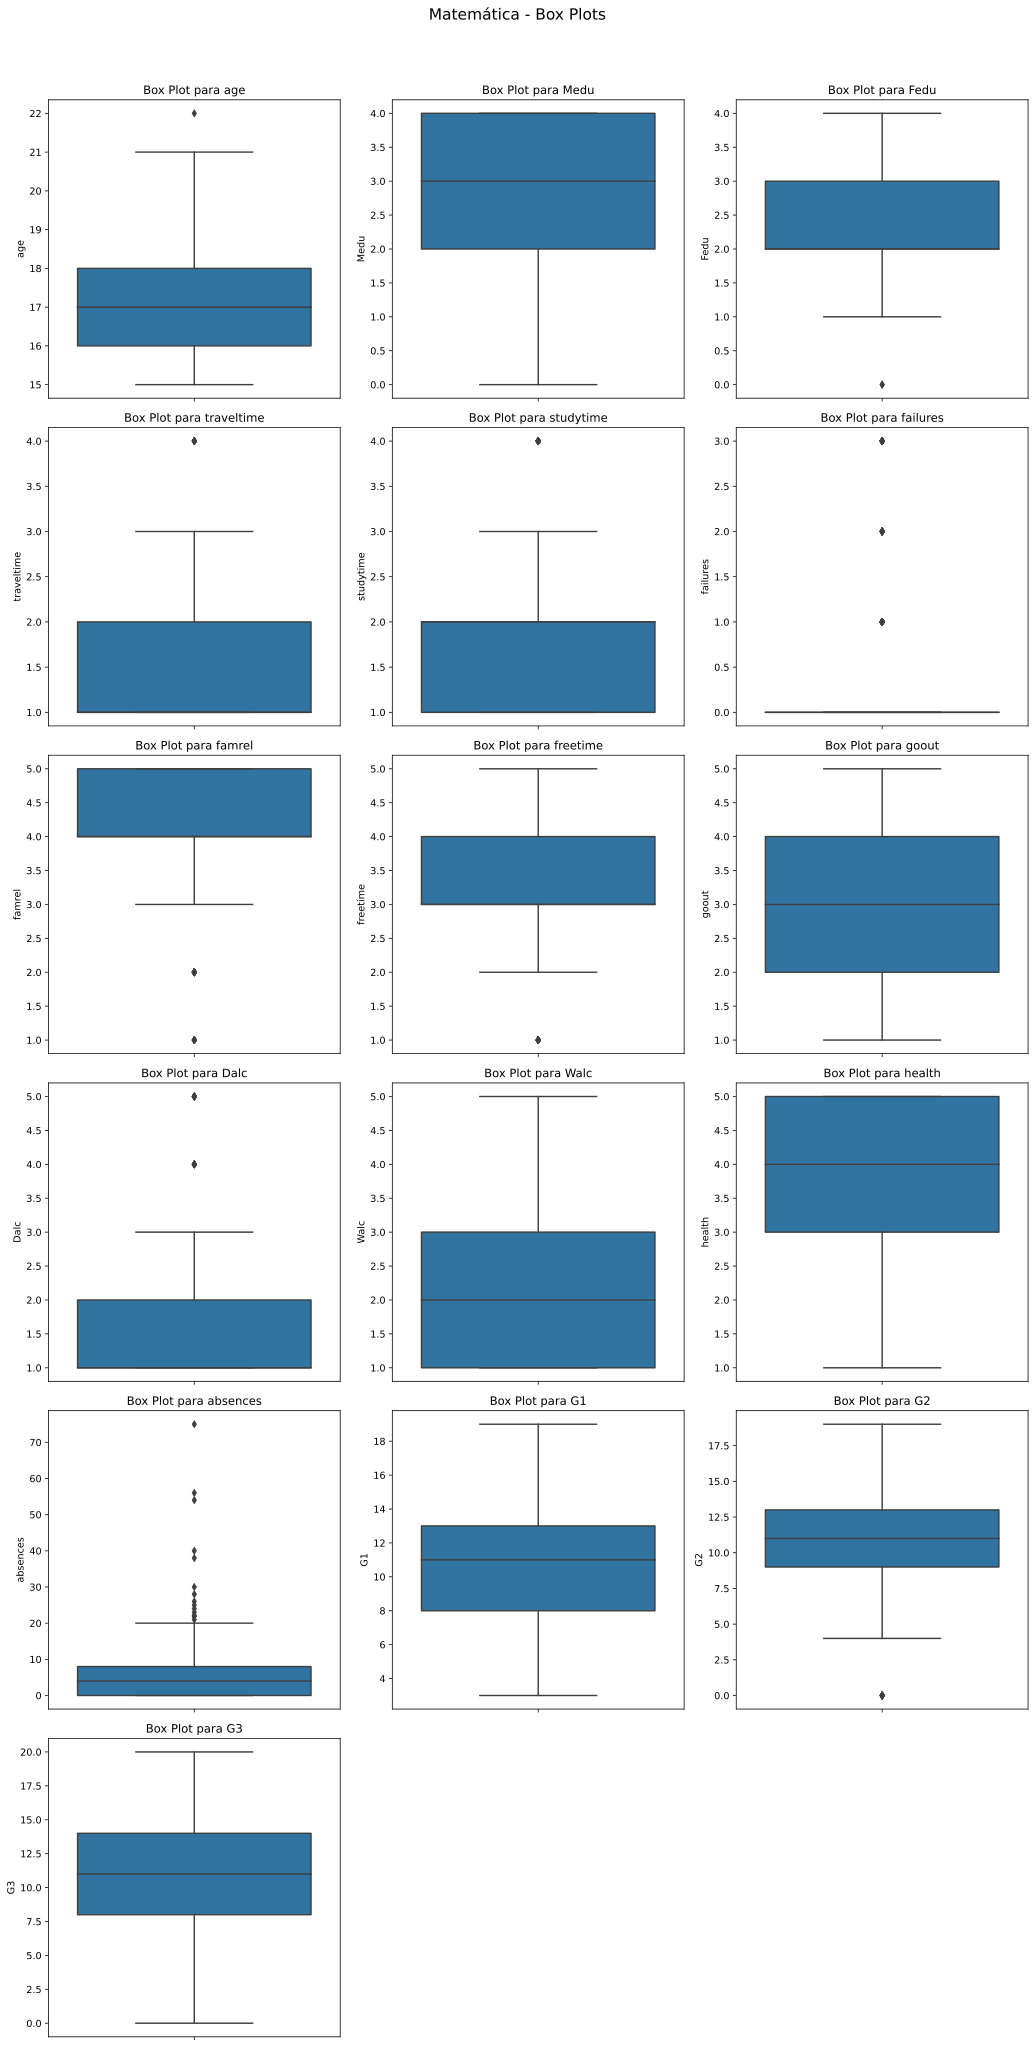

In [ ]:
boxplot(df_math, 'Matemática')

## Português

Não há valores nulos ou ausentes.

In [ ]:
# Check for missing values
display(df_port.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Não há valores incorretos ou discrepantes (ruído).

In [ ]:
# Identifying Uncommon Values
# Display unique values for each categorical column
categorical_columns = df_port.select_dtypes(include='object').columns
for column in categorical_columns:
  unique_values = df_port[column].unique()
  display(f"Unique values for {column}: {unique_values}")

"Unique values for school: ['GP' 'MS']"

"Unique values for sex: ['F' 'M']"

"Unique values for address: ['U' 'R']"

"Unique values for famsize: ['GT3' 'LE3']"

"Unique values for Pstatus: ['A' 'T']"

"Unique values for Mjob: ['at_home' 'health' 'other' 'services' 'teacher']"

"Unique values for Fjob: ['teacher' 'other' 'services' 'health' 'at_home']"

"Unique values for reason: ['course' 'other' 'home' 'reputation']"

"Unique values for guardian: ['mother' 'father' 'other']"

"Unique values for schoolsup: ['yes' 'no']"

"Unique values for famsup: ['no' 'yes']"

"Unique values for paid: ['no' 'yes']"

"Unique values for activities: ['no' 'yes']"

"Unique values for nursery: ['yes' 'no']"

"Unique values for higher: ['yes' 'no']"

"Unique values for internet: ['no' 'yes']"

"Unique values for romantic: ['no' 'yes']"

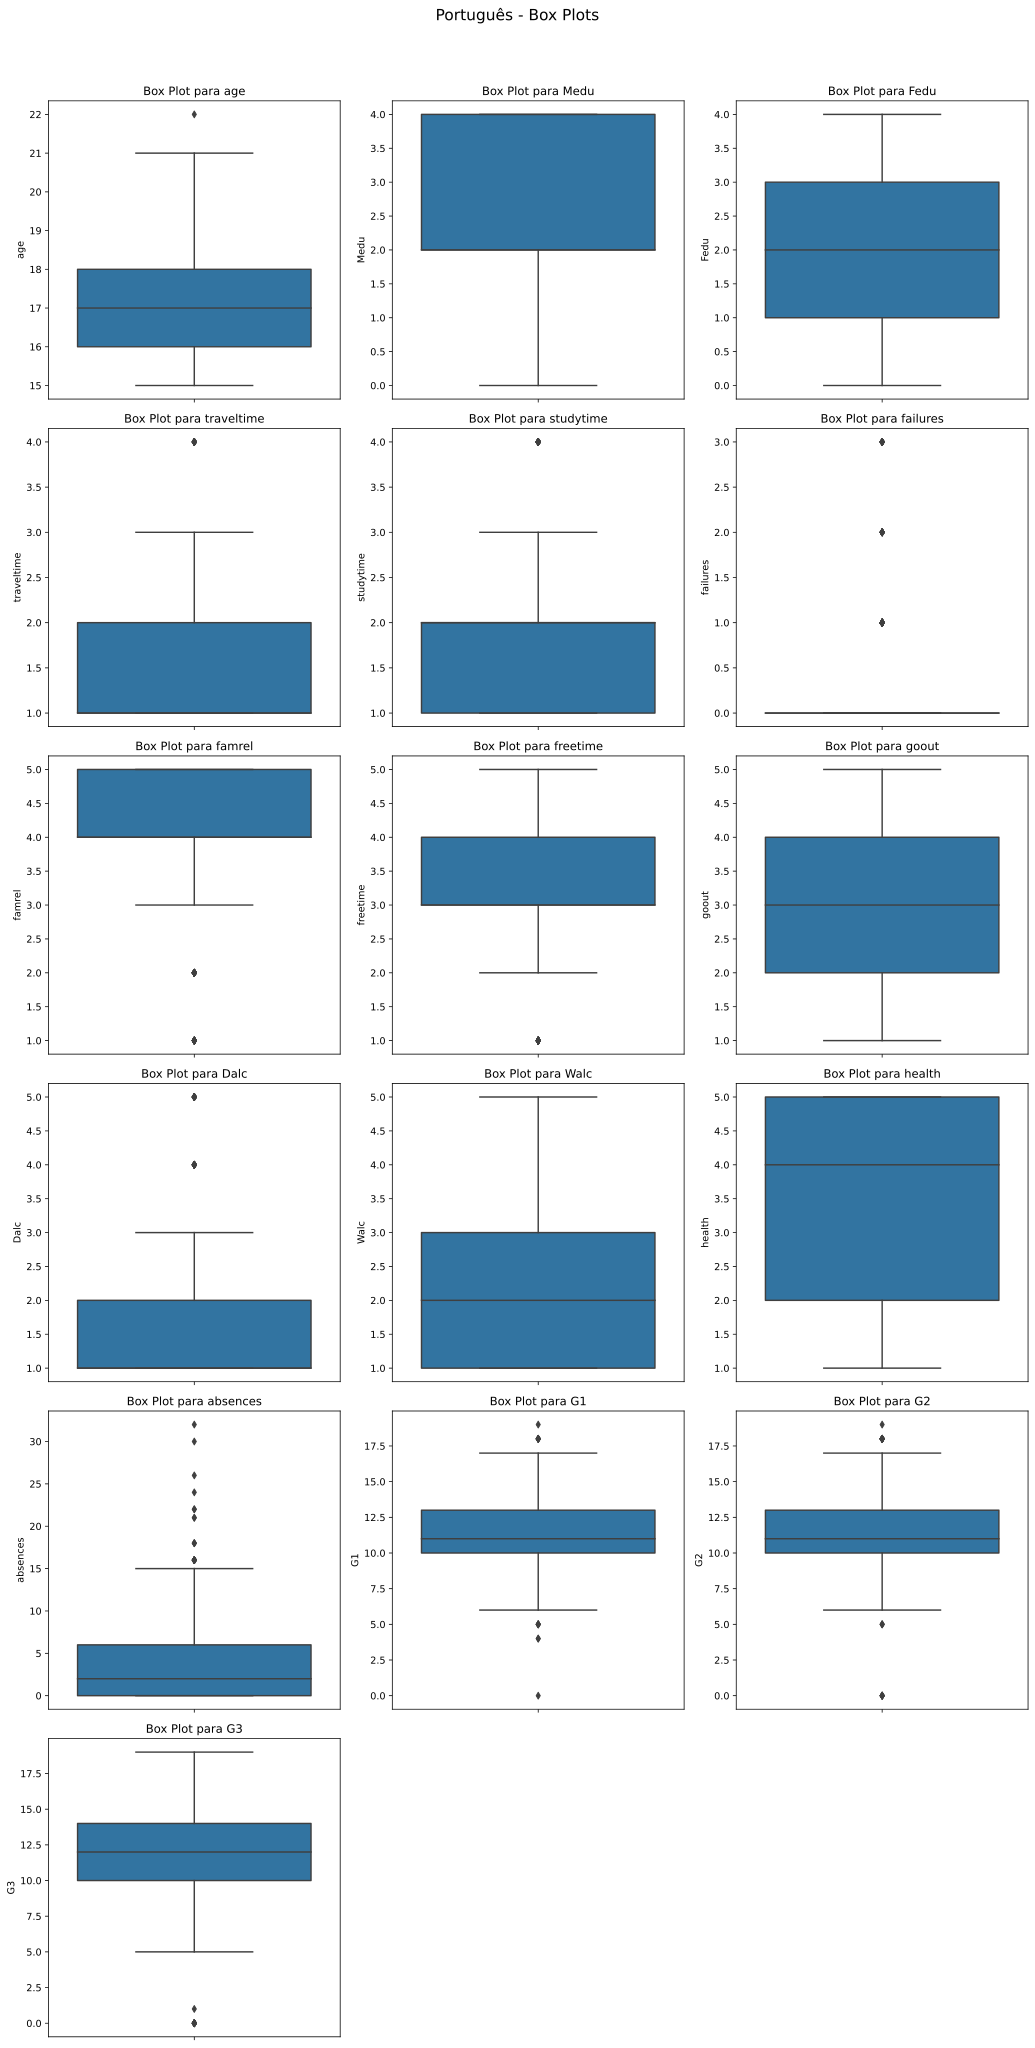

In [ ]:
boxplot(df_port, 'Português')

# Análise Descritiva

In [ ]:
def describe(df):
  return df.describe().applymap(lambda x: f'{x:.0f}' if x.is_integer() else f'{x:.2f}')

In [ ]:
def skewness(df):
  numeric_columns = df.select_dtypes(include=['number']).columns
  # Calculate skewness for each numeric column
  skewness = df[numeric_columns].apply(lambda x: skew(x))
  return skewness

## Matemática

In [ ]:
display(describe(df_math))

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15,0,0,1,1,0,1,1,1,1,1,1,0,3,0,0
25%,16,2,2,1,1,0,4,3,2,1,1,3,0,8,9,8
50%,17,3,2,1,2,0,4,3,3,1,2,4,4,11,11,11
75%,18,4,3,2,2,0,5,4,4,2,3,5,8,13,13,14
max,22,4,4,4,4,3,5,5,5,5,5,5,75,19,19,20


Assimetria de cada coluna:

In [ ]:
display(skewness(df_math))

age           0.464498
Medu         -0.317170
Fedu         -0.031552
traveltime    1.600920
studytime     0.629739
failures      2.377951
famrel       -0.948263
freetime     -0.162730
goout         0.116060
Dalc          2.182434
Walc          0.609634
health       -0.492723
absences      3.657622
G1            0.239699
G2           -0.430004
G3           -0.729887
dtype: float64

Colunas com dados simétricos:

In [ ]:
# Check if skewness is close to 0 (symmetric)
symmetric_columns = skewness.abs() < 0.5
display(symmetric_columns[symmetric_columns].index)

AttributeError: 'function' object has no attribute 'abs'

## Português

In [ ]:
display(describe(df_port))

Assimetria de cada coluna:

In [ ]:
display(skewness(df_port))

Colunas com dados simétricos:

In [ ]:
# Check if skewness is close to 0 (symmetric)
symmetric_columns = skewness.abs() < 0.5
display(symmetric_columns[symmetric_columns].index)

# Visualização

In [ ]:
def plot(df, title_prefix=""):
  # Selecting columns for bar plots (categorical and int64 columns)
  categorical_columns = df.select_dtypes(include='object').columns
  numeric_columns = df.select_dtypes(include='int64').columns

  # Combine both types of columns
  selected_columns = list(categorical_columns) + list(numeric_columns)

  # Setting up subplots
  num_plots = len(selected_columns)
  num_cols = 3  # Number of columns in each row of subplots
  num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))  # Adjust figsize

  # Flatten the axes to handle both 1-row and multi-row subplots
  axes = axes.flatten()

  # Plotting bar plots for each selected column
  for i, column in enumerate(selected_columns):
    if column == 'absences':
      axes[i].tick_params(axis='x', rotation=90)  # Rotate labels by 90 degrees
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Gráfico de barras para {column}')

  # Set a title for the entire subplot frame
  fig.suptitle(f'{title_prefix} - Gŕaficos de Barras', fontsize=16)

  # Adjust layout to prevent overlapping
  plt.tight_layout(rect=[0, 0, 1, 0.96])

  plt.show()

## Matemática

In [ ]:
plot(df_math, 'Matemática')

## Português

In [ ]:
plot(df_port, 'Português')

In [ ]:
# Loop para calcular e exibir a distribuição de frequências estilizada para cada variável
for coluna in df_port.columns:
    distribuicao = df_port[coluna].value_counts().sort_index().to_frame()
    display(distribuicao.style.set_caption(f'Distribuição de Frequências de {coluna}').set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '18px'), ('color', 'purple')]
    }]))

# Perguntas


1. Quanto o relacionamento familiar contribui para o consumo alcoólico dos estudantes? (por ex: Há um maior consumo de álcool devido a um pior relacionamento com a família?)
2. Como o consumo alcoólico está relacionado ao desempenho acadêmico?
3. O consumo de bebidas alcoólicas varia conforme o gênero?
4. Sair mais com os amigos contribui para o aumento do consumo de bebidas?
5. O nível de escolaridade dos pais está relacionado ao alcoolismo precoce?
6. A ênfase escolhida pelo aluno possui alguma correlação com o consumo de álcool?

In [ ]:
alcohol_consumption_columns = ['Dalc', 'Walc']

In [ ]:
def subset_df(df: pd.DataFrame, cols: list):
  return df[cols]

In [ ]:
def alcohol_corr_plt(df: pd.DataFrame, cols: list, title_suffix: str):
  ss_df = subset_df(df, alcohol_consumption_columns + cols)

  # Calculate the correlation matrix
  correlation_matrix = ss_df.corr()

  # Mask redundant diagonal values
  mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

  # Create a heatmap
  plt.figure(figsize=(8, 6))
  heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, square=True, mask=mask)

  # Set plot title
  plt.title('Correlation Heatmap - Alcohol Consumption and ' + title_suffix)

  # Show the plot
  plt.show()

In [ ]:
def alcohol_corr_sig(df: pd.DataFrame, cols: list):
  subset_df = df[alcohol_consumption_columns + cols]

  # Create an empty DataFrame to store the results
  significance_results = pd.DataFrame(index=alcohol_consumption_columns, columns=cols)

  # Iterate through each combination of alcohol and family relationship
  for alc_variable in alcohol_consumption_columns:
    for col in cols:
      # Calculate the correlation coefficient and p-value
      corr_coef, p_value = pearsonr(subset_df[alc_variable], subset_df[col])

      # Check if the p-value is less than the significance level (e.g., 0.05)
      significance = 'Significant' if p_value < 0.05 else 'Not Significant'

      # Store the result in the DataFrame
      significance_results.at[alc_variable, col] = significance
  # Display the significance results
  display("Significance of Correlations:")
  display(significance_results)

## Quanto o relacionamento familiar contribui para o consumo alcoólico dos estudantes?

### Matemática

In [ ]:
alcohol_corr_plt(df_math, ['famrel'], 'Family Relationship Quality')

In [ ]:
alcohol_corr_sig(df_math, ['famrel'])

Analisando este heatmap, percebemos que há uma correlação estatisticamente significante ainda que pequena entre o consumo de álcool nos fins de semana e o relacionamento familiar.


### Português

In [ ]:
alcohol_corr_plt(df_port, ['famrel'], 'Family Relationship Quality')

In [ ]:
alcohol_corr_sig(df_port, ['famrel'])

## Como o consumo alcoólico está relacionado ao desempenho acadêmico?

### Matemática

In [ ]:
alcohol_corr_plt(df_math, ['failures', 'G1', 'G2', 'G3', 'absences'], 'Academic Performance')

In [ ]:
alcohol_corr_sig(df_math, ['failures', 'G1', 'G2', 'G3', 'absences'])

Ao correlacionarmos a performance acadêmica - incluindo variáveis como notas (G1,G2,G3), se repetiu de ano, faltas - com o hábito alcoólico podemos notar que:

Reprovações e faltas estão relacionadas ao consumo de álcool (tanto nos dias de semana, quanto nos fins de semanas). Ou seja, há um nexo entre estudantes com reprovações ou diversas faltas e usuários de bebida.

### Português

## O consumo de bebidas alcoólicas varia conforme o gênero?

### Matemática

In [ ]:
# Select the relevant columns
gender_alcohol_columns = ['sex', 'Dalc', 'Walc']

# Create a DataFrame subset with the selected columns
subset_df = df_math[gender_alcohol_columns]

# Create a contingency table
contingency_table = pd.crosstab(subset_df['sex'], [subset_df['Dalc'], subset_df['Walc']])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
display(f"Chi-Square Statistic: {chi2_stat:.3f}")
display(f"P-value: {p_value:.3f}")

# Check if the result is statistically significant (e.g., using a significance level of 0.05)
if p_value < 0.05:
    display("The association between alcohol consumption and gender is statistically significant.")
else:
    display("There is no statistically significant association between alcohol consumption and gender.")


In [ ]:
# Calculate Cramer's V
n = subset_df.shape[0]
cramer_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
print(f"Cramer's V: {cramer_v:.3f}")


In [ ]:
# Create a normalized contingency table
normalized_table = pd.crosstab(subset_df['sex'], subset_df['Dalc'], normalize='index')

# Plot the stacked bar chart with normalized values
normalized_table.plot(kind='bar', stacked=True)
plt.title('Normalized Alcohol Consumption by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Dalc')
plt.show()

Ao analisarmos o padrão de consumo por gênero, percebe-se que os usuários masculinos tem maior tendência de consumirem quantidades elevadas de álcool do que quando comparado às usuárias femininas

### Português

## Sair mais com os amigos contribui para o aumento do consumo de bebidas?

### Matemática

In [ ]:
alcohol_corr_plt(df_math, ['goout'], 'Going Out with Friends')

In [ ]:
# Perform a correlation test for 'goout' and 'Dalc'
corr_coef_dalc, p_value_dalc = pearsonr(subset_df['goout'], subset_df['Dalc'])
print(f"Correlation Coefficient (Dalc): {corr_coef_dalc:.3f}")
print(f"P-value (Dalc): {p_value_dalc:.3f}")

# Perform a correlation test for 'goout' and 'Walc'
corr_coef_walc, p_value_walc = pearsonr(subset_df['goout'], subset_df['Walc'])
print(f"Correlation Coefficient (Walc): {corr_coef_walc:.3f}")
print(f"P-value (Walc): {p_value_walc:.3f}")

Correlacionando as variáveis entre o consumo de bebidas e sair com os amigos, inferimos que
há uma certa relação principalmente aos finais de semana

### Português

## O nível de escolaridade dos pais está relacionado ao alcoolismo precoce?

### Matemática

In [ ]:
# Select the relevant columns
education_alcohol_columns = ['Medu', 'Fedu', 'Dalc', 'Walc']

# Create a DataFrame subset with the selected columns
subset_df = df_math[education_alcohol_columns]

# Create contingency tables for Dalc and Walc vs. Medu
contingency_table_dalc = pd.crosstab(subset_df['Dalc'], subset_df['Medu'])
contingency_table_walc = pd.crosstab(subset_df['Walc'], subset_df['Medu'])

# Perform the chi-square test for Dalc vs. Medu
chi2_stat_dalc, p_value_dalc, dof_dalc, expected_dalc = chi2_contingency(contingency_table_dalc)
print(f"Chi-Square Statistic (Dalc vs. Medu): {chi2_stat_dalc:.3f}")
print(f"P-value (Dalc vs. Medu): {p_value_dalc:.3f}")

# Perform the chi-square test for Walc vs. Medu
chi2_stat_walc, p_value_walc, dof_walc, expected_walc = chi2_contingency(contingency_table_walc)
print(f"Chi-Square Statistic (Walc vs. Medu): {chi2_stat_walc:.3f}")
print(f"P-value (Walc vs. Medu): {p_value_walc:.3f}")

# Create contingency tables for Dalc and Walc vs. Fedu
contingency_table_dalc_fedu = pd.crosstab(subset_df['Dalc'], subset_df['Fedu'])
contingency_table_walc_fedu = pd.crosstab(subset_df['Walc'], subset_df['Fedu'])

# Perform the chi-square test for Dalc vs. Fedu
chi2_stat_dalc_fedu, p_value_dalc_fedu, dof_dalc_fedu, expected_dalc_fedu = chi2_contingency(contingency_table_dalc_fedu)
print(f"Chi-Square Statistic (Dalc vs. Fedu): {chi2_stat_dalc_fedu:.3f}")
print(f"P-value (Dalc vs. Fedu): {p_value_dalc_fedu:.3f}")

# Perform the chi-square test for Walc vs. Fedu
chi2_stat_walc_fedu, p_value_walc_fedu, dof_walc_fedu, expected_walc_fedu = chi2_contingency(contingency_table_walc_fedu)
print(f"Chi-Square Statistic (Walc vs. Fedu): {chi2_stat_walc_fedu:.3f}")
print(f"P-value (Walc vs. Fedu): {p_value_walc_fedu:.3f}")

O nível de escolaridade dos pais não apresenta ter relevância para com o consumo na adolescência

### Português

## A ênfase escolhida pelo aluno possui alguma correlação com o consumo de álcool?

In [ ]:
# Select the relevant columns
alcohol_columns = ['Dalc', 'Walc']

# Create DataFrame subsets with the selected columns for both subjects
subset_df_portuguese = df_port[alcohol_columns]
subset_df_math = df_math[alcohol_columns]

# Perform t-tests for alcohol consumption
t_stat_dalc, p_value_dalc = ttest_ind(subset_df_portuguese['Dalc'], subset_df_math['Dalc'])
t_stat_walc, p_value_walc = ttest_ind(subset_df_portuguese['Walc'], subset_df_math['Walc'])

# Display t-test results
display("T-Test Results (Dalc):")
display(f"T-Statistic: {t_stat_dalc:.3f}")
display(f"P-value: {p_value_dalc:.3f}")

display("T-Test Results (Walc):")
display(f"T-Statistic: {t_stat_walc:.3f}")
display(f"P-value: {p_value_walc:.3f}")

Não há uma associação relevante entre a escolha das disciplinas (português ou matemática) e o alcoolismo.


# Informações do dataset

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran.
Email: fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain@studenti.unicam.it
University Of Camerino

https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION